In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 2D mesh

This notebook shows how to pad a 2D mesh.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


<IPython.core.display.Javascript object>


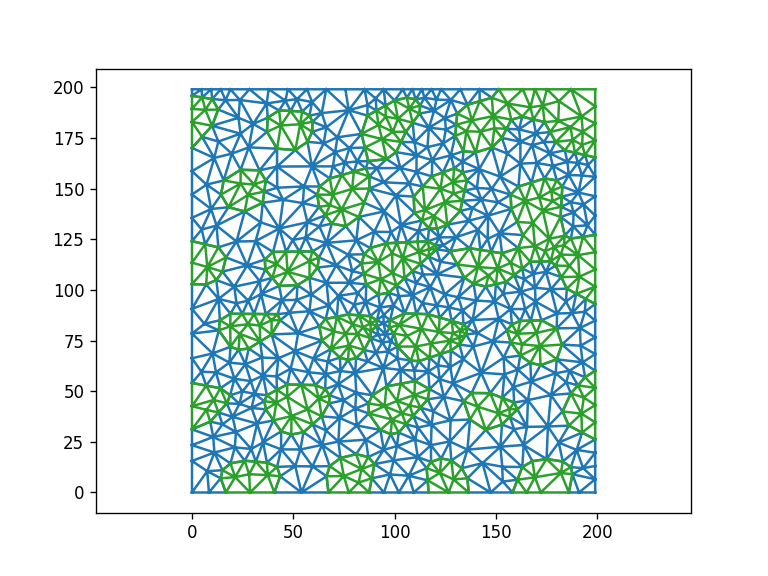

<AxesSubplot:>

In [3]:
from nanomesh.mesh_container import TriangleMesh

mesh = TriangleMesh.read(filename='out.msh')

# drop third dimension
mesh.drop_third_dimension()

# drop gmsh attributes
mesh.metadata.pop('gmsh:physical')
mesh.metadata.pop('gmsh:geometrical')

mesh.plot()

In [4]:
mesh.pad(side='left', width=10, opts='q30a100', label=3)

AttributeError: 'TriangleMesh' object has no attribute 'pad'

In [37]:
side = 'right'
width=10
opts='q30a100'
label=3

right_edge, top_edge = mesh.vertices.max(axis=0)
left_edge, bottom_edge = mesh.vertices.min(axis=0)

if side=='left':
    is_edge = mesh.vertices[:,0] == left_edge
    corners = np.array([[left_edge-width, top_edge], [left_edge-width, bottom_edge]])
if side=='bottom':
    is_edge = mesh.vertices[:,1] == bottom_edge
    corners = np.array([[left_edge, bottom_edge-width], [right_edge, bottom_edge-width]])
if side=='right':
    is_edge = mesh.vertices[:,0] == right_edge
    corners = np.array([[right_edge+width, top_edge], [right_edge+width, bottom_edge]])
if side=='top':
    is_edge = mesh.vertices[:,1] == top_edge
    corners = np.array([[left_edge, top_edge+width], [right_edge, top_edge+width]])
    
edge_coords = mesh.vertices[is_edge]
edge_coords

array([[199.        ,   0.        ],
       [199.        , 199.        ],
       [199.        , 151.39267426],
       [199.        , 199.        ],
       [199.        ,  75.69633713],
       [199.        ,  37.84816856],
       [199.        , 113.54450569],
       [199.        ,  18.92408428],
       [199.        ,  94.62042141],
       [199.        , 132.46858998],
       [199.        ,   9.46204214],
       [199.        , 104.08246355],
       [199.        ,   4.73102107],
       [199.        , 123.00654783],
       [199.        , 108.81348462],
       [199.        ,  56.77225285],
       [199.        ,  66.23429499],
       [199.        , 118.27552676],
       [199.        ,  14.19306321],
       [199.        ,  85.15837927],
       [199.        , 141.93063212],
       [199.        , 175.19633713],
       [199.        , 163.29450569],
       [199.        ,  47.31021071],
       [199.        ,  28.38612642],
       [199.        , 169.24542141],
       [199.        , 187.09816856]])

<IPython.core.display.Javascript object>


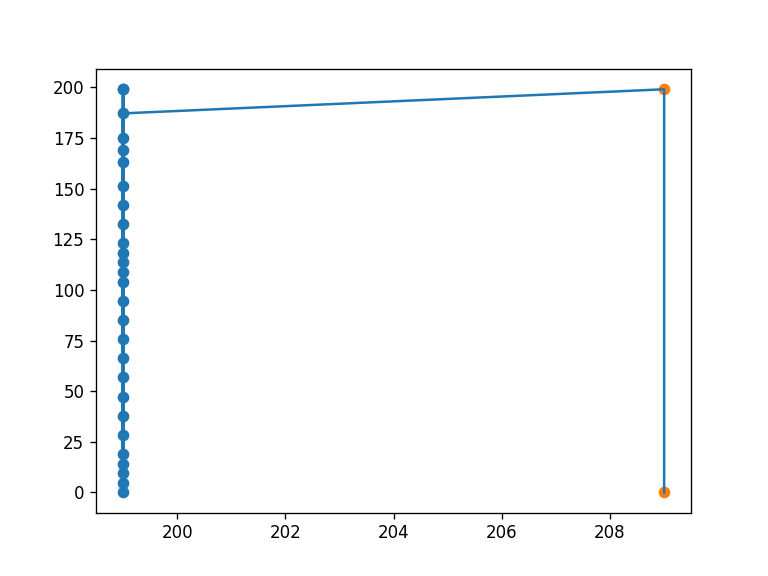

In [19]:
plt.figure()
plt.scatter(*edge_coords.T)
plt.scatter(*corners.T)

coords = np.vstack([edge_coords, corners])
plt.plot(*coords.T)

<IPython.core.display.Javascript object>


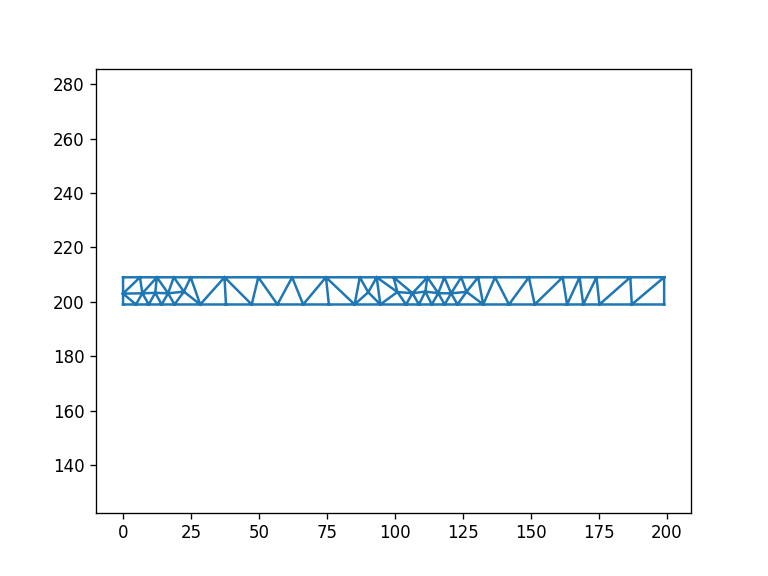

<AxesSubplot:>

In [20]:
triangle_dict_in = {'vertices':coords}
triangle_dict_out = tr.triangulate(triangle_dict_in, opts)

border_mesh = TriangleMesh.from_triangle_dict(triangle_dict_out)

border_mesh.metadata['labels'] = np.ones(len(border_mesh.faces), dtype=int) * label

border_mesh.plot()

In [21]:
bm = border_mesh

bm.vertices

array([[199.        ,   0.        ],
       [199.        , 199.        ],
       [199.        , 151.39267426],
       [199.        , 199.        ],
       [199.        ,  75.69633713],
       [199.        ,  37.84816856],
       [199.        , 113.54450569],
       [199.        ,  18.92408428],
       [199.        ,  94.62042141],
       [199.        , 132.46858998],
       [199.        ,   9.46204214],
       [199.        , 104.08246355],
       [199.        ,   4.73102107],
       [199.        , 123.00654783],
       [199.        , 108.81348462],
       [199.        ,  56.77225285],
       [199.        ,  66.23429499],
       [199.        , 118.27552676],
       [199.        ,  14.19306321],
       [199.        ,  85.15837927],
       [199.        , 141.93063212],
       [199.        , 175.19633713],
       [199.        , 163.29450569],
       [199.        ,  47.31021071],
       [199.        ,  28.38612642],
       [199.        , 169.24542141],
       [199.        , 187.09816856],
 

In [23]:
bm.faces

array([[29, 44, 46],
       [37, 43, 54],
       [37, 52, 43],
       [20, 30,  2],
       [ 6, 45, 17],
       [18, 43, 52],
       [25, 34, 21],
       [31, 23, 60],
       [43, 18, 10],
       [52, 53,  7],
       [54, 36, 40],
       [60, 23,  5],
       [14, 42,  6],
       [50, 46,  8],
       [31, 15, 23],
       [12,  0, 36],
       [14, 44, 42],
       [35, 16, 59],
       [52,  7, 18],
       [56, 34, 25],
       [19,  4, 35],
       [40, 36, 28],
       [15, 31, 59],
       [52, 37, 39],
       [24, 33, 60],
       [16, 35,  4],
       [45,  6, 42],
       [52, 39, 53],
       [47, 13, 17],
       [32, 47, 41],
       [20, 55, 30],
       [45, 47, 17],
       [54, 10, 12],
       [48, 13, 47],
       [42, 44, 38],
       [41, 47, 45],
       [27, 26, 61],
       [44, 14, 11],
       [46, 44, 11],
       [30, 51,  2],
       [51, 56, 22],
       [38, 44, 29],
       [45, 38, 41],
       [34, 61, 21],
       [58, 50,  8],
       [27,  1, 26],
       [15, 59, 16],
       [11,  

In [85]:
mesh_edge_index = np.argwhere(is_edge)
buffer_edge_index = np.arange(len(edge_index)).reshape(-1,1)
edge_mapping = np.hstack([buffer_edge_index, mesh_edge_index]).T
edge_mapping

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26],
       [  1,   2, 320, 321, 343, 344, 345, 346, 347, 348, 349, 350, 361,
        382, 407, 431, 443, 444, 459, 488, 501, 505, 507, 645, 728, 751,
        795]], dtype=int64)

In [98]:
n_vertices = len(mesh.vertices)

n_duplicate = len(edge_coords)
n_new = len(bm.vertices) - n_duplicate

print(n_vertices, n_duplicate, n_new)
mesh_index = np.arange(n_vertices, n_vertices + n_new)
pad_index = np.arange(n_duplicate, n_duplicate + n_new)

mapping = np.vstack([pad_index, mesh_index])

# append previous mapping
mapping = np.hstack([edge_mapping, mapping])
mapping

801 27 35


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61],
       [  1,   2, 320, 321, 343, 344, 345, 346, 347, 348, 349, 350, 361,
        382, 407, 431, 443, 444, 459, 488, 501, 505, 507, 645, 728, 751,
        795, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812,
        813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
        826, 827, 828, 829, 830, 831, 832, 833, 834, 835]], dtype=int64)

In [109]:
shape = bm.faces.shape
buffer_faces = bm.faces.copy().ravel()

replace = mapping
mask = np.in1d(buffer_faces, replace[0, :])
buffer_faces[mask] = replace[1, np.searchsorted(replace[0, :], buffer_faces[mask])]
buffer_faces = buffer_faces.reshape(shape)

In [107]:
buffer_vertices = bm.vertices[n_duplicate:]
buffer_vertices

array([[209.        , 199.        ],
       [209.        ,   0.        ],
       [209.        ,  99.5       ],
       [209.        , 149.25      ],
       [209.        ,  49.75      ],
       [209.        , 124.375     ],
       [209.        ,  24.875     ],
       [209.        , 174.125     ],
       [209.        ,  74.625     ],
       [203.        ,   0.        ],
       [209.        ,  12.4375    ],
       [209.        , 111.9375    ],
       [209.        ,  18.65625   ],
       [209.        ,   6.21875   ],
       [209.        , 118.15625   ],
       [203.74898448, 111.17899516],
       [203.29176273,  11.82755268],
       [203.14191434, 106.44797409],
       [203.14191434, 115.91001623],
       [203.57931124, 100.87319117],
       [203.09742596, 120.6410373 ],
       [203.64101612, 126.314058  ],
       [209.        ,  87.0625    ],
       [209.        ,  93.28125   ],
       [209.        , 161.6875    ],
       [203.10159529,  16.55857375],
       [203.72016335,  22.36978347],
 

In [114]:
buffer_labels = np.ones(len(buffer_faces)) * label

In [118]:
mesh.vertices = np.vstack([mesh.vertices, buffer_vertices])

In [117]:
mesh.faces = np.vstack([mesh.faces, buffer_faces])

In [116]:
mesh.metadata['labels'] = np.hstack([mesh.metadata['labels'], buffer_labels])

<IPython.core.display.Javascript object>


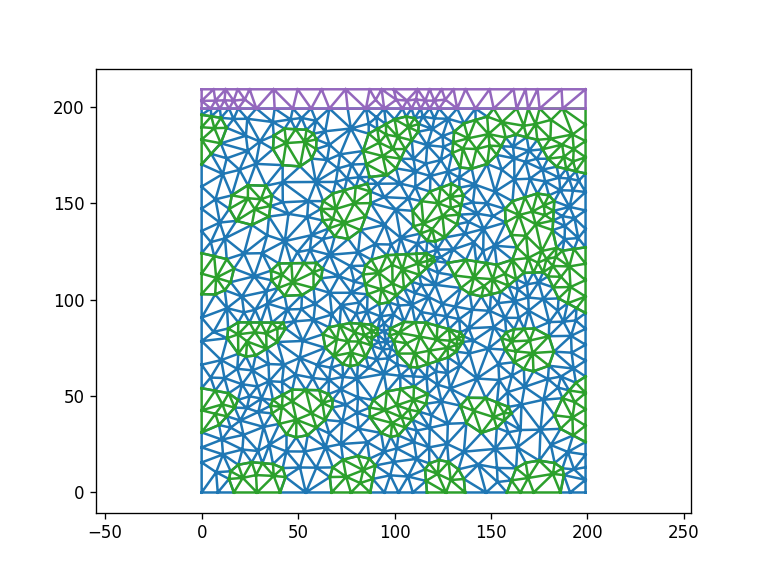

<AxesSubplot:>

In [119]:
mesh.plot()